# **WHEN WILL YOUR BATTERY A RETIREE**: Predicting Battery Remaining Useful Life in Vehicles Using kNN Regression

Have you ever experienced a sudden battery drain in your vehicle, leaving you stranded on the road? It's a common occurrence that can be frustrating, especially when you're unsure of the cause. Should you blame the battery manufacturer, the vehicle manufacturer, or something else entirely? This is known as the "blame game" of battery life drain.

A study published in the journal "IEEE Access" in 2020 addressed the problem of predicting the remaining useful life of batteries in electric vehicles. The researchers used a dataset of real-world driving cycles and battery performance data to develop a predictive model for estimating the battery's remaining useful life using some attributes/features, which may help in deciding who is truly to blame.

---
## Problem

As the world continues to move towards a more sustainable future, the use of electric vehicles is growing rapidly. However, one of the key challenges associated with electric vehicles is accurately predicting the remaining useful life of the battery. Predicting the battery's remaining useful life is critical for **maximizing vehicle range** and ensuring that the **vehicle's performance meets the owner's expectations**. Additionally, battery replacements can be expensive and environmentally costly, so accurately predicting the remaining useful life of the battery can help reduce waste and improve resource efficiency. Therefore, the ability to accurately predict the battery's remaining useful life in automobiles and vehicles is a critical area of research with the potential to **improve the performance and sustainability of electric vehicles and reduce waste**. In this context, using a dataset to predict the battery's remaining useful life in automobiles and vehicles is a promising approach that can contribute to addressing this important problem.

---
## Data Discussion

### The `Battery Remaining Useful Life (RUL)` dataset

The dataset aims to predict the remaining useful life of car and vehicle batteries by considering key factors such as cycle index, maximum voltage discharge, and minimum voltage charge through the application of kNN regression algorithm. Such predictions can be valuable for car owners and manufacturers alike, enabling them to plan and prepare for battery replacement and maintenance activities in advance, thus ensuring safer and more reliable vehicles on the road. With accurate predictions, vehicle owners can be more proactive in their approach to maintenance, potentially saving money and avoiding potential hazards.

### Attribute Information
1) Cycle Index: The current charge cycle of an battery.

2) Discharge Time (s): number of cycle time to reach the minimum voltage (discharging time).

3) Time at 4.15V (s): is the time required for the voltage to decrease from 3.6V to 3.4V.

4) Time Constant Current (s): is the time the voltage reaches 4.15V.

5) Decrement 3.6-3.4V (s): .is the time when the current remains constant at its maximum value.

6) Max. Voltage Discharge (V): is the initial and maximum value of voltage.

7) Min. Voltage Charge (V): is the initial (also minimum) value of voltage.

8) Charging Time (s): is the total charging time.

9) Remaining Useful Life (RUL): target

You may check on GitHub how the dataset was built: https://github.com/ignavinuales/Battery_RUL_Prediction

---
### Importing Libraries & Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Battery_RUL.csv to Battery_RUL.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv("Battery_RUL.csv")

from sklearn.neighbors import KNeighborsRegressor
from numpy import array
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

---
## Highlights

The following highlights were discovered using the kNN algorithm:

1. The optimal no. of neighbors is: <br>
   a. 8 with 97.80% mean test acc. & std of 0.0087. (using all 8 features) <br>
   b. 50 with 99.95% mean test acc. & std of 0.0001. (using only top 3 features)
2. The features that affect the target most are attributes/features `Cycle Index: number of cycle`, `Max. Voltage Discharge (V)`, `Min. Voltage Charge (V)`

### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [ ]:
df.head(5)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


### Treating **null** values


In [ ]:
df.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

>This shows there is **no null values** for this dataset

---
## Knn Regression Implementation

>Features/Independent Variables include:  
1.   `Cycle_Index`
2.   `Discharge Time (s)`
3.   `Decrement 3.6-3.4V (s)`
4.   `Max. Voltage Discharge (V)`
5.   `Min. Voltage Charge (V)`
6.   `Time at 4.15V (s)`
7.   `Time constant current (s)`
8.   `Charging Time (s)`

>Target/Dependent Variable is `Remaining Useful Life (RUL)`

In [ ]:
X = df.drop(['RUL'],axis=1)
y = df['RUL']
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [ ]:
XX=np.reshape(X, (len(X),-1))  #Reshape the list to array
XX

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65
...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62


In [ ]:
#Create 2 empty dataframes to store our train/test accuracy
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seed in range(1,50,1): # perform 50 trials
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seed)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 51) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model
        reg.fit(X_train, y_train) # train the model
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy
    lahat_training[seed] = training_accuracy # appends the training accuracy of the current iteration
    lahat_test[seed] = test_accuracy # appends the test accuracy of the current iteration

mean_test_accuracy = lahat_test.mean()
print(f"Mean test accuracy: {mean_test_accuracy.tolist()[0]:.4f}")
sd = lahat_test.std()
print(f"Standard Deviation: {sd.tolist()[0]:.4f}")
#Here, tolist() method is called to convert the numpy.ndarray object to a regular Python list, and then the [0] index
#is used to extract the first (and only) element in the list, which is the mean or standard deviation value.
#The :.4f format specifier is then applied to the extracted value.

Mean test accuracy: 0.9780
Standard Deviation: 0.0087


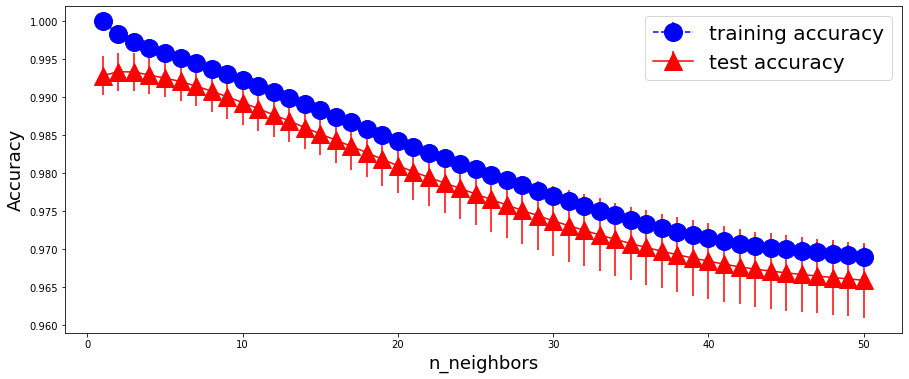

In [ ]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend();

### Finding the optimal number of neighbors

In [ ]:
train_mean_accuracy = lahat_training.mean(axis=1) # Mean accuracy across all seeds/trials for each value of n_neighbors on training data
test_mean_accuracy = lahat_test.mean(axis=1) # Mean accuracy across all seeds/trials for each value of n_neighbors on test data

difference = train_mean_accuracy - test_mean_accuracy
min_index = np.argmin(difference) # Assign min_index to the lowest difference value of train_mean_accuracy & test_mean_accuracy
optimal_n_neighbors = min_index + 1
train_acc = train_mean_accuracy[optimal_n_neighbors - 1]
test_acc = test_mean_accuracy[optimal_n_neighbors - 1]

print(f"The optimal n_neighbors would be {optimal_n_neighbors}, as it has the lowest distance difference with the value of {difference[min_index]:.4f}.")
print(f"Whilst maintaining an accuracy of training={train_acc:.4f} test={test_acc:.4f}")

The optimal n_neighbors would be **8**, as it has the lowest distance difference with the value of 0.0030.
Whilst maintaining an accuracy of training=0.9938 test=0.9908


### Finding the Top 3 Features

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value for each feature
correlations = [(feature, *pearsonr(df['RUL'], df[feature])) for feature in XX]

# Sort the features based on the absolute value of their correlation coefficient in descending order
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)


# Use Hall's Hypothesis to determine the top features
alpha = 0.05
top_features = [feature for feature, corr, p_value in correlations_sorted if p_value < alpha][:3]

print(f'Top features: {correlations},{top_features}')

Top features: [('Cycle_Index', -0.9997560734551791, 0.0), ('Discharge Time (s)', 0.011956715694436935, 0.14225531057220356), ('Decrement 3.6-3.4V (s)', 0.011998438670636095, 0.14086836192028118), ('Max. Voltage Dischar. (V)', 0.7827997740417801, 0.0), ('Min. Voltage Charg. (V)', -0.7598048445416941, 0.0), ('Time at 4.15V (s)', 0.17651418279694964, 1.0935844024142657e-105), ('Time constant current (s)', 0.040675099924794844, 5.916268227776302e-07), ('Charging time (s)', 0.01829874017803364, 0.024710000012607175)],['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)']


### Optimizing the model using only the TOP 3 Features: `Cycle Index: number of cycle`, `Max. Voltage Discharge (V)`, `Min. Voltage Charge (V)`

>Features/Independent Variables include:
1.   `Cycle Index: number of cycle`
2.   `Max. Voltage Discharge (V)`
3.   `Min. Voltage Charge (V)`

>Target/Dependent Variable is `RUL`

In [ ]:
predictor_vars = ['Cycle_Index','Max. Voltage Dischar. (V)','Min. Voltage Charg. (V)']
X = df[predictor_vars]
y = df['RUL']
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [ ]:
XX=np.reshape(X, (len(X),-1))  #Reshape the list to array
XX

,Cycle_Index,Max. Voltage Dischar. (V),Min. Voltage Charg. (V)
0,1.0,3.670,3.211
1,2.0,4.246,3.220
2,3.0,4.249,3.224
3,4.0,4.250,3.225
4,6.0,4.290,3.398
...,...,...,...
15059,1108.0,3.773,3.742
15060,1109.0,3.773,3.744
15061,1110.0,3.773,3.742
15062,1111.0,3.763,3.839


In [ ]:
#Create 2 empty dataframes to store our train/test accuracy
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seed in range(1,50,1): # perform 50 trials
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seed)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 51) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model
        reg.fit(X_train, y_train) # train the model
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy
    lahat_training[seed] = training_accuracy # appends the training accuracy of the current iteration
    lahat_test[seed] = test_accuracy # appends the test accuracy of the current iteration

mean_test_accuracy = lahat_test.mean()
print(f"Mean test accuracy: {mean_test_accuracy.tolist()[0]:.4f}")
sd = lahat_test.std()
print(f"Standard Deviation: {sd.tolist()[0]:.4f}")

Mean test accuracy: 0.9995
Standard Deviation: 0.0001


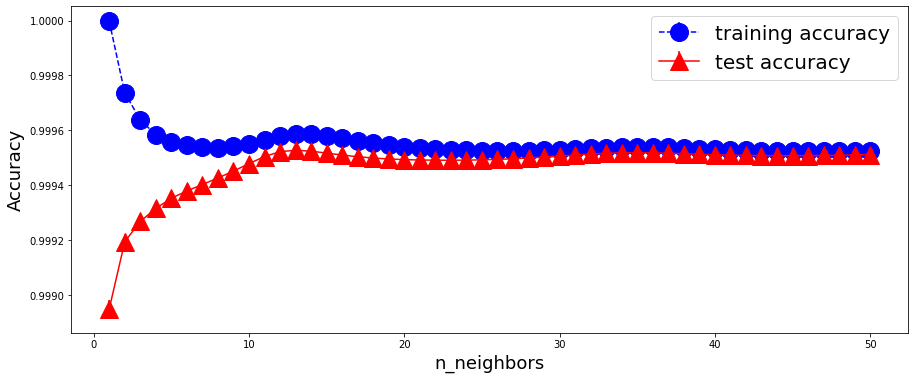

In [ ]:
fig = plt.figure(figsize=(15, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend();

### Finding the optimal number of neighbors for the Optimized model with only the TOP 3 Features: `Cycle Index: number of cycle`, `Max. Voltage Discharge (V)`, `Min. Voltage Charge (V)`

In [ ]:
train_mean_accuracy = lahat_training.mean(axis=1) # Mean accuracy across all seeds/trials for each value of n_neighbors on training data
test_mean_accuracy = lahat_test.mean(axis=1) # Mean accuracy across all seeds/trials for each value of n_neighbors on test data

difference = train_mean_accuracy - test_mean_accuracy
min_index = np.argmin(difference) # Assign min_index to the lowest difference value of train_mean_accuracy & test_mean_accuracy
optimal_n_neighbors = min_index + 1
train_acc = train_mean_accuracy[optimal_n_neighbors - 1]
test_acc = test_mean_accuracy[optimal_n_neighbors - 1]

print(f"The optimal n_neighbors would be {optimal_n_neighbors}, as it has the lowest distance difference with the value of {difference[min_index]:.4f}.")
print(f"Whilst maintaining an accuracy of training={train_acc:.4f} test={test_acc:.4f}")

The optimal n_neighbors would be 50, as it has the lowest distance difference with the value of 0.0000.
Whilst maintaining an accuracy of training=0.9995 test=0.9995


---
## Discussion of Results

|test optimal neighbors<br> (all 8)|test optimal neighbors <br> (top 3)
|:-----|:-----------|
|n=8|n=50|

>These results suggest that the initial KNN regression model with 8 attributes/features had an optimal n_neighbor value of 8, indicating that the model performed best when using 8 neighbors. However, after using Hall's Hypothesis to identify the top 3 features and optimizing the KNN regression model using only those 3 features, the optimal n_neighbor value increased to 50. This suggests that while reducing the number of features improved the model's performance on those specific features, it required more neighbors to achieve optimal results overall.

|test accuracy<br> (all 8)|test accuracy <br> (top 3)|
|:----|:-----------|
|97.80%|99.95%|

>By only using the top 3 features of our dataset it shows that indeed those said features are the most influencial among the 8 features, hence `Cycle Index: number of cycle`, `Max. Voltage Discharge (V)`, `Min. Voltage Charge (V)` highly influences the battery's remaining useful life.

>By using only the top 3 features it performed better by 2.1989%

>It is worth noting that the optimized model (using only top 3 features)  outperforms the initial model (using all 8 features) which made the model more efficient.

>When a car battery is discharged, its voltage decreases. If the battery is discharged beyond its `Maximum Voltage Discharge (V)` rating, it can lead to irreversible damage and significantly reduce its remaining usable life. On the other hand, if the battery is charged at a voltage below its `Minimum Voltage Charge (V)` rating, it can also damage the battery and reduce its remaining usable life.

>Therefore, it is important to maintain the proper voltage levels when using and charging a car battery to maximize its remaining usable life. Regularly monitoring the battery's voltage levels and following the manufacturer's recommendations for charging and discharging can help prolong the battery's life.

>In addition to maintaining proper voltage levels, the number of cycles a battery goes through also plays an important role in determining its remaining useful life. Every time the battery is charged and discharged, each cycle gradually reduces the battery's capacity to hold a charge. As the battery goes through more cycles, the active materials inside it degrade, and its internal resistance increases, which leads to a shorter overall lifespan. Thus, tracking the Cycle Index and replacing the battery when it nears the end of its useful life can help prevent unexpected breakdowns and ensure the car's reliability on the road.

Credits to the author of this dataset: [IGNACIO VINUALES](https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul)

